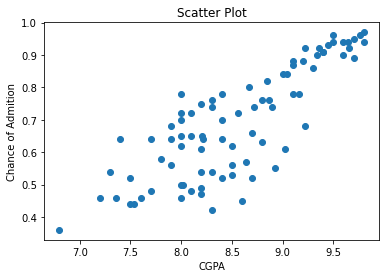

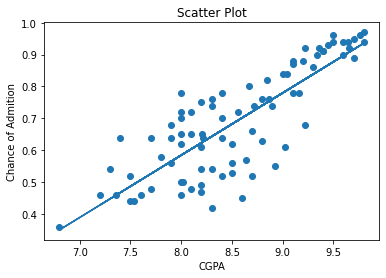


Asssociation : - 0.8240085681388136 
Association is near 1 so we can have a straight line

	***Regression Statistics***
Standard Deviation	 0.710941895435068
R Sqaure		 0.6789901203661777
Beta0			-0.976312553044084
Beta1			0.1951043149382123

ANOVA TABLE
		df	SS	MS		F	    significance F
Regression	1	1.616	1.61614845 	177.67419     6.20325e-22
Residual	82	0.764	0.00909614
Total		83	2.380	


In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# 1.Create a function to read data from CSV into two sequences
def data_csv():
    with open("Admission_Predict.csv", 'r') as f:
        csv_reader = csv.reader(f, delimiter=",")
        next(csv_reader)
        temp1 = []
        temp2 = []
        for row in csv_reader:
            temp1.append(float(row[0]))
            temp2.append(float(row[1]))
#2. Copy the  sequence into numpy vectors
        y = np.array(temp2)
        x = np.array(temp1)
        return x, y

# 3. Visualize the data with scatter plot
def sca_plot(y, x):
    plt.scatter(x, y)
    plt.xlabel("CGPA")
    plt.ylabel("Chance of Admition")
    plt.title("Scatter Plot")
    plt.show()


def std_dev(x):
    meanx = np.mean(x)
    var1 = (sum((x-meanx)**2)/len(x))**0.5
    return var1

# 4. Check if association exits between the data
def correl(y, x):
    meanx = np.mean(x)
    meany = np.mean(y)
    r = sum(((x-meanx) / std_dev(x)) * ((y-meany) / std_dev(y))) / (len(x))
    return r

# 6.  Fit the model
def f_line(y, x):
    meanx = np.mean(x)
    meany = np.mean(y)
    beta1 = sum((x-meanx)*(y-meany)) / sum((x-meanx)*(x-meanx))
    beta0 = meany - (beta1*meanx)
    plt.plot(x, beta1 * x + beta0)
    sca_plot(y, x)
    plt.show()
    return beta0, beta1

# 9. Create Anova Table
def anova_table(y, x, meanx, meany, b0, b1):
    k = 2  # as we have two groups
    SSreg = sum(((b0+b1*x)-meany)**2)
    SSres = sum((y-(b0+b1*x))**2)
    SStot = sum((y-meany)**2)
    Msreg = SSreg/(k-1)
    Msres = SSres/len(x)
    print("ANOVA TABLE")
    print("\t\tdf\tSS\tMS\t\tF\t    significance F")
    print(
        f"Regression\t{k-1}\t{SSreg:.3f}\t{Msreg:.8f} \t{Msreg/Msres:.5f}     {6.20325E-22}")
    print(f"Residual\t{len(x) - k}\t{SSres:.3f}\t{Msres:.8f}")
    print(f"Total\t\t{len(x)-1}\t{SStot:.3f}\t")


if __name__ == "__main__":
    data2, data1 = data_csv()
    sca_plot(data1, data2)
    stdev = std_dev(data2)
    r = correl(data1, data2)
    beta0, beta1 = f_line(data1, data2)
    meanx = np.mean(data2)
    meany = np.mean(data1)
#     8. Calculate R-Square
    r_square = sum((beta0 + beta1*data2 - (meany))**2) / sum((data1-meany)**2)
    
    print(f"\nAsssociation : - {r} ")
    print("Association is near 1 so we can have a straight line\n")
    print("\t***Regression Statistics***")
    print(f"Standard Deviation\t {stdev}")
    print(f"R Sqaure\t\t {r_square}")
    print(f"Beta0\t\t\t{beta0}")
    print(f"Beta1\t\t\t{beta1}\n")
    anova_table(data1, data2, meanx, meany, beta0, beta1)
